# ANLY590 HW1 Tianyi Yang

In [159]:
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LassoCV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. 

**Regularization. Using the accompanying Hitters dataset, we will explore
regression models to predict a player's Salary from other variables.**

In [156]:
ht = pd.read_csv("Hitters.csv")

### 1.1

**Use LASSO regression to predict Salary from the other numeric predictors.
Create a visualization of the coefficient trajectories. Comment on which are the
final three predictors that remain in the model. Use cross-validation to find the
optimal value of the regularization penality. How many predictors are left in
that model?**

In [11]:
# Drop NA values in ht dataset
ht_c = ht.dropna(axis=0,subset=['Salary'])

In [15]:
# Keep only numeric columns
ht_c = ht_c[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary']]

In [17]:
ht_X = ht_c[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors']]

In [20]:
ht_Y = ht_c['Salary']

In [214]:
# write a function that will return the coefficient
def get_coef(my_alpha):
    model = linear_model.Lasso(alpha=my_alpha,max_iter=10000)
    model.fit(ht_X,ht_Y)
    return(model.coef_)

In [215]:
# create a dataframe to store the results
my_alphas = [0.01,0.1,1,100,1000,3000,5000,8000,10000]
lasso_results = pd.DataFrame(index=np.arange(0, len(my_alphas)), columns=ht_X.columns)

In [216]:
# record coefficients for different alpha values
for i in range(len(my_alphas)):  
    lasso_results.iloc[i] = get_coef(my_alphas[i])

In [217]:
lasso_results['alphas']=my_alphas
lasso_results

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,alphas
0,-2.20295,7.82719,2.16164,-2.09881,-0.0223033,6.15075,-2.58821,-0.176304,0.0699048,-0.232744,1.60994,0.801293,-0.793897,0.294575,0.383982,-2.87822,0.01
1,-2.20228,7.82207,2.14446,-2.092,-0.0167902,6.14794,-2.55083,-0.176559,0.0711934,-0.229652,1.60892,0.800079,-0.793497,0.294591,0.383865,-2.87382,0.10
2,-2.19468,7.78039,2.037,-2.03339,0.00331031,6.12475,-2.17017,-0.179146,0.0827188,-0.205318,1.60009,0.791568,-0.790099,0.294722,0.382654,-2.82581,1.00
3,-1.73199,5.87715,0,-0,0,4.76735,-0,-0.226468,0.336511,0,1.28545,0.745472,-0.598519,0.290427,0.26543,-0,100.00
4,0.193946,1.03466,0,0,0,0,-0,-0.300821,0.706684,0,0.801895,0.614929,0,0.289224,0.0980247,-0,1000.00
5,0.518537,0,0,0,0,0,-0,-0.0985145,0.304729,0,0.378876,0.403235,0,0.285849,0,-0,3000.00
6,0.469737,0,0,0,0,0,-0,0,0.164659,0,0.0710256,0.291088,0,0.280936,0,-0,5000.00
7,0.358479,0,0,0,0,0,-0,0.061443,0.0622436,0,0,0.124251,0,0.273154,0,-0,8000.00
8,0.278198,0,0,0,0,0,-0,0.0964114,0,0,0,0,0,0.268759,0,-0,10000.00


In [218]:
plot_lasso = pd.melt(lasso_results, ['alphas'])
plot_lasso['value']= pd.to_numeric(plot_lasso['value'])
plot_lasso['alphas']= pd.to_numeric(plot_lasso['alphas'])

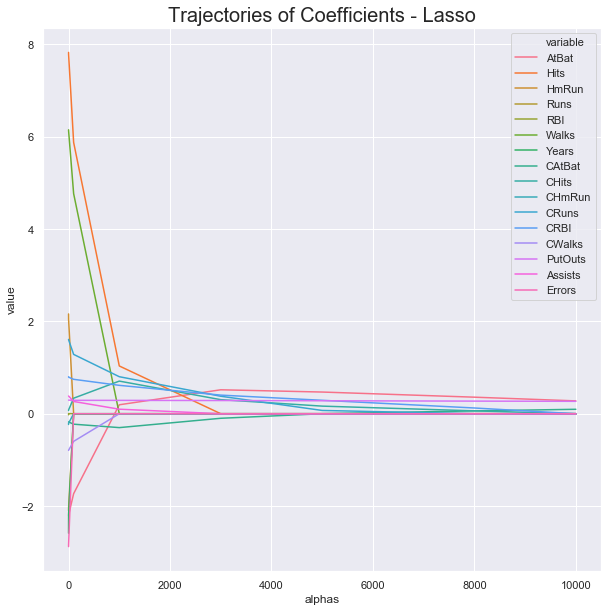

In [219]:
sns.set()
plt.figure(figsize=(10,10))
ax= sns.lineplot(x='alphas', y='value', hue='variable', 
             data=plot_lasso)
ax.set_title('Trajectories of Coefficients - Lasso').set_fontsize(20)

We can see that: The final 3 predictors are: AtBat, CAtBat and PutOuts	

In [220]:
lassocv = linear_model.LassoCV(cv=10,max_iter=10000)
lassocv.fit(ht_X, ht_Y)
print('optimal_alpha: ',lassocv.alpha_)

optimal_alpha:  540.6556677332911


In [221]:
print('For the optimal alpha, there are ',sum(get_coef(lassocv.alpha_)!=0),' predictors left')

For the optimal alpha, there are  9  predictors left


## 1.2
**Repeat with Ridge Regression. Visualize coeecient trajectories. Use cross-
validation to nd the optimal vaule of the regularization penalty.**

In [185]:
# write a function that will return the coefficient for Ridge
def get_ridge_coef(my_alpha):
    model = linear_model.Ridge(alpha=my_alpha,max_iter=10000)
    model.fit(ht_X,ht_Y)
    return(model.coef_)

In [184]:
# create a dataframe to store the results
my_alphas = [0.01,0.1,1,100,1000,3000,5000,8000,10000]
ridge_results = pd.DataFrame(index=np.arange(0, len(my_alphas)), columns=ht_X.columns)

In [187]:
# record coefficients for different alpha values
for i in range(len(my_alphas)):  
    ridge_results.iloc[i] = get_ridge_coef(my_alphas[i])

In [188]:
ridge_results['alphas']=my_alphas
ridge_results

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,alphas
0,-2.20302,7.82775,2.16353,-2.09956,-0.0229113,6.15106,-2.59233,-0.176276,0.0697632,-0.233086,1.61005,0.801427,-0.793941,0.294573,0.383995,-2.87871,0.01
1,-2.20301,7.82768,2.16339,-2.09948,-0.0228703,6.15102,-2.59194,-0.17628,0.0697774,-0.233062,1.61004,0.801418,-0.793936,0.294574,0.383994,-2.87867,0.10
2,-2.20288,7.82697,2.16196,-2.09869,-0.0224598,6.15063,-2.58808,-0.176312,0.0699191,-0.232827,1.60993,0.801331,-0.793885,0.294575,0.383985,-2.87826,1.00
3,-2.18935,7.75134,2.01223,-2.01454,0.0207199,6.10886,-2.21999,-0.179555,0.0846918,-0.20838,1.59853,0.792287,-0.788411,0.294736,0.382904,-2.83469,100.00
4,-2.09111,7.20818,1.10778,-1.43027,0.279475,5.792,-0.899306,-0.19744,0.180288,-0.061985,1.51187,0.737808,-0.746267,0.295337,0.373354,-2.52572,1000.00
5,-1.92302,6.39441,0.326225,-0.663041,0.483292,5.28912,-0.314438,-0.219909,0.307024,0.0748052,1.38816,0.687022,-0.678665,0.295309,0.357893,-2.06863,3000.00
6,-1.78542,5.81326,0.053512,-0.203402,0.54019,4.91462,-0.157635,-0.235891,0.390721,0.130673,1.30879,0.666166,-0.628227,0.294952,0.346999,-1.76497,5000.00
7,-1.61416,5.16162,-0.0928206,0.222358,0.558834,4.47788,-0.0696,-0.254202,0.479383,0.166524,1.22886,0.652191,-0.569472,0.294362,0.334639,-1.45644,8000.00
8,-1.51692,4.81926,-0.127397,0.407123,0.55774,4.24015,-0.042606,-0.263998,0.523968,0.177051,1.19057,0.647623,-0.537532,0.293993,0.327897,-1.30808,10000.00


In [197]:
plot_ridge = pd.melt(ridge_results, ['alphas'])
plot_ridge['value']= pd.to_numeric(plot_ridge['value'])
plot_ridge['alphas']= pd.to_numeric(plot_ridge['alphas'])

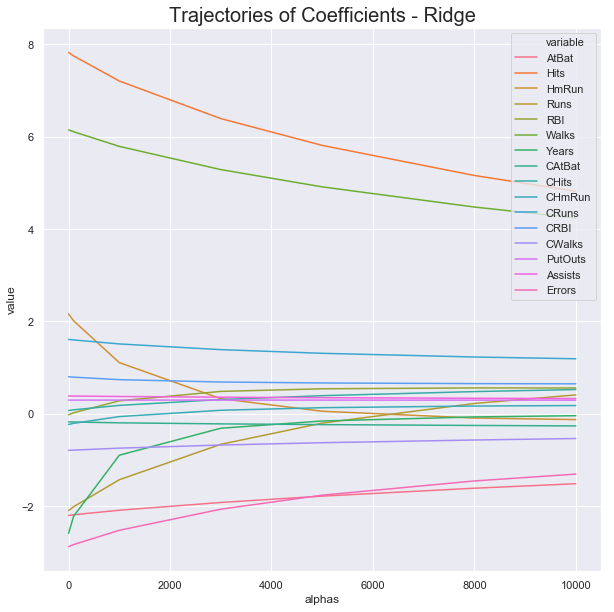

In [199]:
sns.set()
plt.figure(figsize=(10,10))
ax= sns.lineplot(x='alphas', y='value', hue='variable', 
             data=plot_ridge)
ax.set_title('Trajectories of Coefficients - Ridge').set_fontsize(20)

In [226]:
ridgecv = linear_model.RidgeCV(alphas= np.arange(100,50000,50),cv=10)
ridgecv.fit(ht_X, ht_Y)
print('optimal_alpha: ',ridgecv.alpha_)

optimal_alpha:  21950


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## 2
**Short Answer. Explain in your own words the bias-variance tradeoff. What
role does regularization play in this tradeoff? Make reference to your findings
in number (1) to describe models of high/low bias and variance**

Variance refers to how much the predicted value would change if we estimated it using a different training data set. Bias refers to the error that is introduced by approximating a rel-life problem. There is a trade-off between the two: in general, more flexible models will reult in higher varaince but lower bias. 

Regularization has advantage over linear model because of bias varaience trade-off. As the panelty increases, the flexibility of the model decreases, resulting in substantial decrease in variance, with a slight increase in bias. 